# ML training and testing

In [25]:

import pandas as pd
import numpy as np
import joblib
from scipy import sparse

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier


from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


In [26]:

X_train = sparse.load_npz("../data/data_ml/X_train.npz")
X_test = sparse.load_npz("../data/data_ml/X_test.npz")
y_train = pd.read_csv("../data/data_ml/y_train.csv").squeeze("columns")
y_test = pd.read_csv("../data/data_ml/y_test.csv").squeeze("columns")

print("Data loaded successfully!")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

Data loaded successfully!
X_train shape: (943, 9165)
y_train shape: (943,)
X_test shape: (236, 9165)
y_test shape: (236,)


In [27]:
#Function to evaluate and print model performance
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

In [28]:
#Function to compare multiple models
def compare_models(models, X_test, y_test):
    results = {}
    for name, model in models.items():
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        results[name] = accuracy
        print(f"{name} Accuracy: {accuracy:.4f}")
    return results

## First round of training

c:\Users\david\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:35:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Evaluating Logistic Regression...
Accuracy: 0.5211864406779662
Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.55      0.53       118
           1       0.52      0.49      0.51       118

    accuracy                           0.52       236
   macro avg       0.52      0.52      0.52       236
weighted avg       0.52      0.52      0.52       236



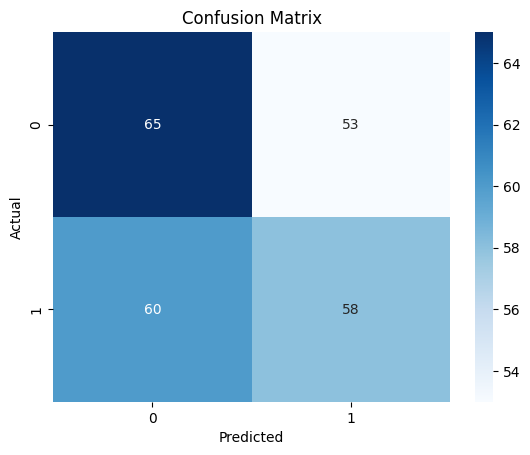

Evaluating Decision Tree...
Accuracy: 0.5211864406779662
Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.54      0.53       118
           1       0.52      0.50      0.51       118

    accuracy                           0.52       236
   macro avg       0.52      0.52      0.52       236
weighted avg       0.52      0.52      0.52       236



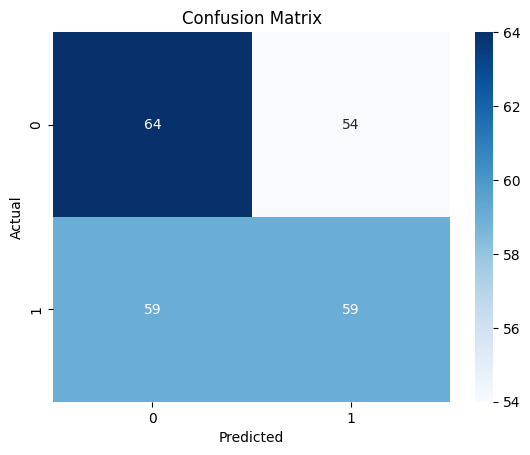

Evaluating K-Nearest Neighbors...
Accuracy: 0.5254237288135594
Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.50      0.51       118
           1       0.52      0.55      0.54       118

    accuracy                           0.53       236
   macro avg       0.53      0.53      0.53       236
weighted avg       0.53      0.53      0.53       236



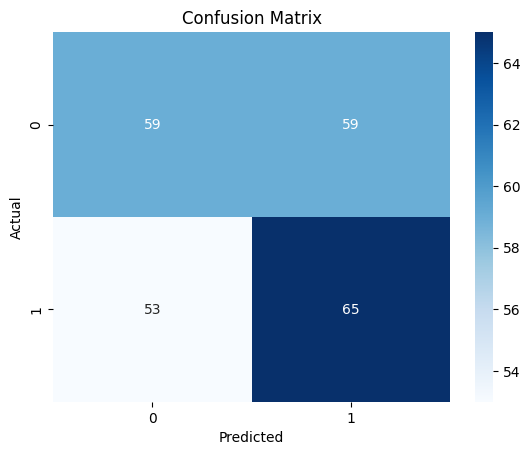

Evaluating Random Forest...
Accuracy: 0.5254237288135594
Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.47      0.50       118
           1       0.52      0.58      0.55       118

    accuracy                           0.53       236
   macro avg       0.53      0.53      0.52       236
weighted avg       0.53      0.53      0.52       236



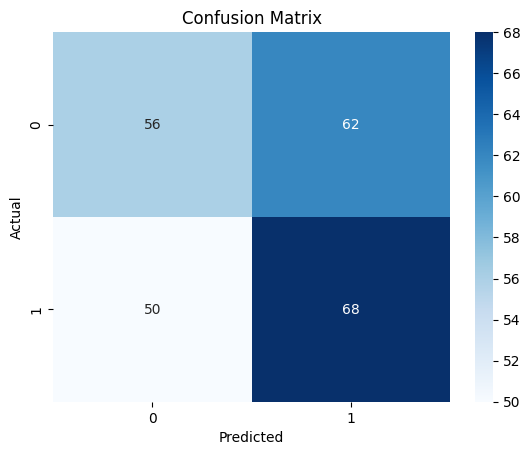

Evaluating Support Vector Machine...
Accuracy: 0.5
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       118
           1       0.50      1.00      0.67       118

    accuracy                           0.50       236
   macro avg       0.25      0.50      0.33       236
weighted avg       0.25      0.50      0.33       236



C:\Users\david\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\david\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\david\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

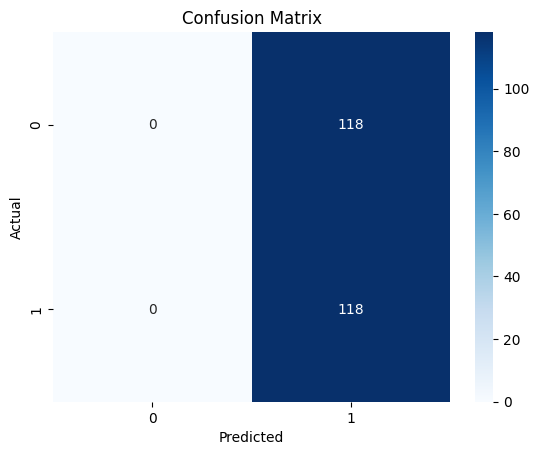

Evaluating XGBoost...
Accuracy: 0.5211864406779662
Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.52      0.52       118
           1       0.52      0.53      0.52       118

    accuracy                           0.52       236
   macro avg       0.52      0.52      0.52       236
weighted avg       0.52      0.52      0.52       236



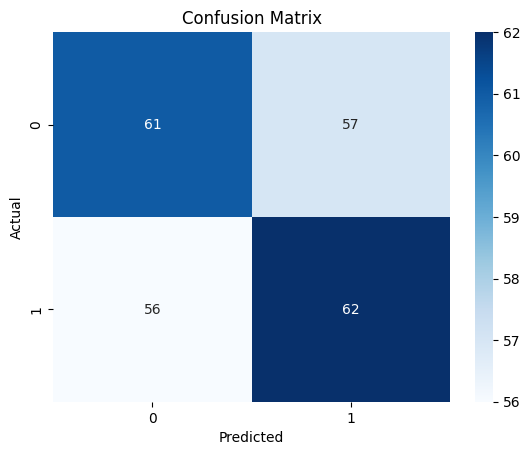

Logistic Regression Accuracy: 0.5212
Decision Tree Accuracy: 0.5212
K-Nearest Neighbors Accuracy: 0.5254
Random Forest Accuracy: 0.5254
Support Vector Machine Accuracy: 0.5000
XGBoost Accuracy: 0.5212


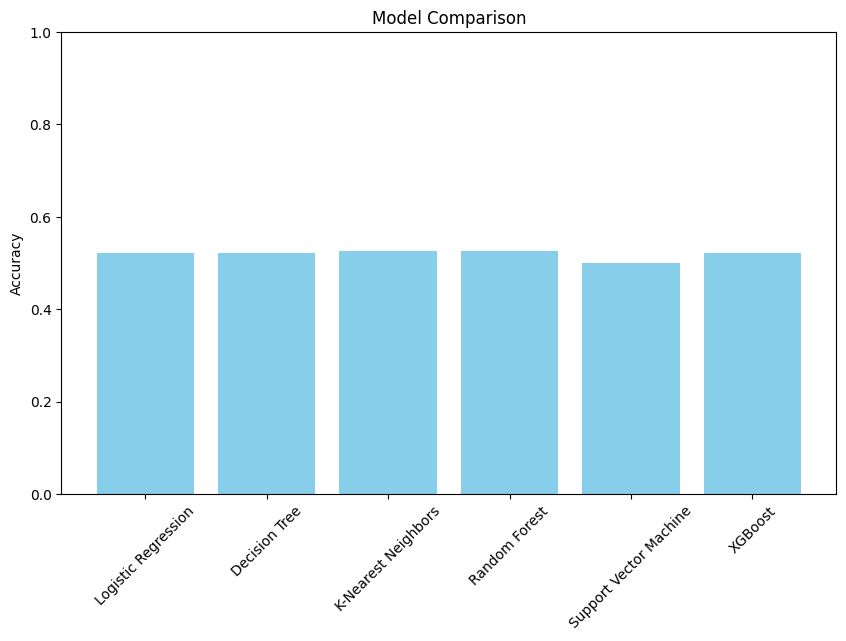

In [29]:
lr_model = LogisticRegression(random_state=42, max_iter=1000)
dt_model = DecisionTreeClassifier(random_state=42)
knn_model = KNeighborsClassifier()
rf_model = RandomForestClassifier(random_state=42)
svm_model = SVC(random_state=42)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)


lr_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

models = {
    "Logistic Regression": lr_model,
    "Decision Tree": dt_model,
    "K-Nearest Neighbors": knn_model,
    "Random Forest": rf_model,
    "Support Vector Machine": svm_model,
    "XGBoost": xgb_model
}

for name, model in models.items():
    print(f"Evaluating {name}...")
    evaluate_model(model, X_test, y_test)


results = compare_models(models, X_test, y_test)

#Graphical comparison of model accuracies
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()

We can conclude that base models perform very poorly

## Round 2

We will be using randomised search to find best metrics for models in order to improve overall f1 score

In [30]:
# Using Randomized Search for Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Random Forest Parameters: {'max_depth': 46, 'min_samples_leaf': 4, 'min_samples_split': 19, 'n_estimators': 267}
Accuracy: 0.5423728813559322
Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.47      0.50       118
           1       0.54      0.62      0.57       118

    accuracy                           0.54       236
   macro avg       0.54      0.54      0.54       236
weighted avg       0.54      0.54      0.54       236



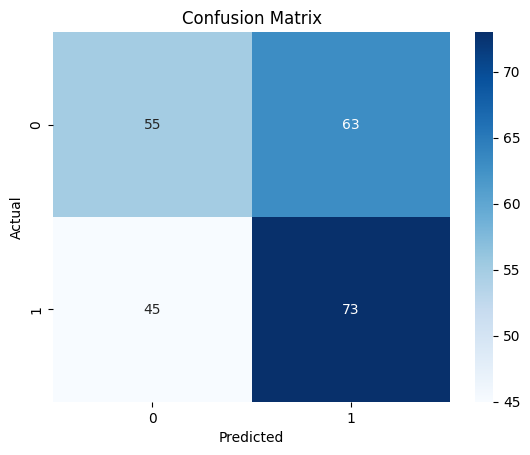

In [31]:
# Hyperparameter grid for Random Forest
rf_param_grid = { 
    'n_estimators': randint(50, 300),
    'max_depth': randint(5, 50),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20)
}
rf_random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=rf_param_grid, n_iter=50, cv=3, verbose=2, random_state=42, n_jobs=-1)
rf_random_search.fit(X_train, y_train)
best_rf_model = rf_random_search.best_estimator_
print("Best Random Forest Parameters:", rf_random_search.best_params_)
evaluate_model(best_rf_model, X_test, y_test)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


c:\Users\david\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:42:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best XGBoost Parameters: {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 290, 'subsample': 0.6}
Accuracy: 0.5084745762711864
Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.51      0.51       118
           1       0.51      0.51      0.51       118

    accuracy                           0.51       236
   macro avg       0.51      0.51      0.51       236
weighted avg       0.51      0.51      0.51       236



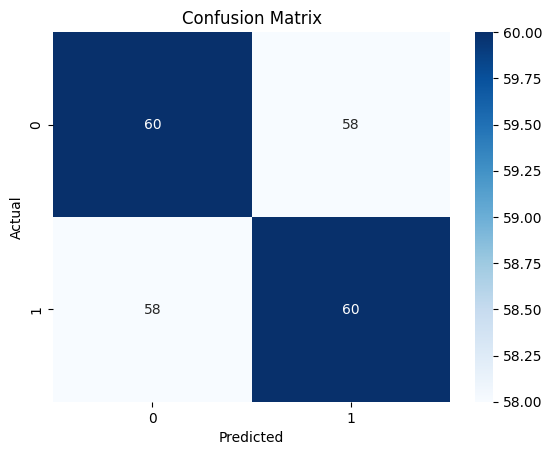

In [32]:
# Hyperparameter grid for XGBoost
xgb_param_grid = { 
    'n_estimators': randint(50, 300),
    'max_depth': randint(3, 20),
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}
xgb_random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=xgb_param_grid, n_iter=50, cv=3, verbose=2, random_state=42, n_jobs=-1)
xgb_random_search.fit(X_train, y_train)
best_xgb_model = xgb_random_search.best_estimator_
print("Best XGBoost Parameters:", xgb_random_search.best_params_)
evaluate_model(best_xgb_model, X_test, y_test)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best SVM Parameters: {'kernel': 'poly', 'gamma': 'scale', 'C': 100}
Accuracy: 0.4915254237288136
Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.45      0.47       118
           1       0.49      0.53      0.51       118

    accuracy                           0.49       236
   macro avg       0.49      0.49      0.49       236
weighted avg       0.49      0.49      0.49       236



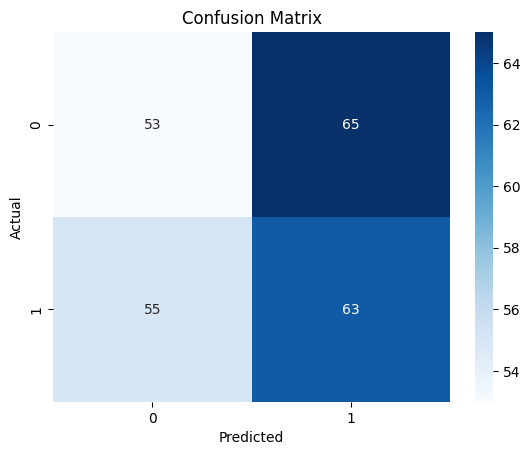

In [33]:
# Hyperparameter grid for SVM
svm_param_grid = { 
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf', 'poly']
}
svm_random_search = RandomizedSearchCV(estimator=svm_model, param_distributions=svm_param_grid, n_iter=20, cv=3, verbose=2, random_state=42, n_jobs=-1)
svm_random_search.fit(X_train, y_train)
best_svm_model = svm_random_search.best_estimator_
print("Best SVM Parameters:", svm_random_search.best_params_)
evaluate_model(best_svm_model, X_test, y_test)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Decision Tree Parameters: {'max_depth': 18, 'min_samples_leaf': 3, 'min_samples_split': 2}
Accuracy: 0.5508474576271186
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.64      0.59       118
           1       0.56      0.46      0.50       118

    accuracy                           0.55       236
   macro avg       0.55      0.55      0.55       236
weighted avg       0.55      0.55      0.55       236



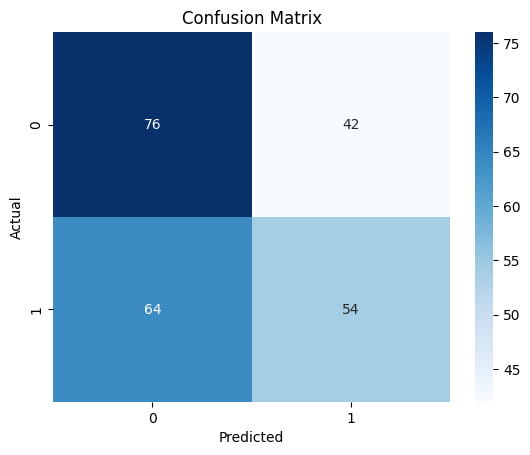

In [34]:
# Hyperparameter grid for Decision Tree
dt_param_grid = {
    'max_depth': randint(5, 50),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20)
}
dt_random_search = RandomizedSearchCV(estimator=dt_model, param_distributions=dt_param_grid, n_iter=50, cv=3, verbose=2, random_state=42, n_jobs=-1)
dt_random_search.fit(X_train, y_train)
best_dt_model = dt_random_search.best_estimator_
print("Best Decision Tree Parameters:", dt_random_search.best_params_)
evaluate_model(best_dt_model, X_test, y_test)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best KNN Parameters: {'metric': 'minkowski', 'n_neighbors': 12, 'weights': 'uniform'}
Accuracy: 0.4872881355932203
Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.58      0.53       118
           1       0.48      0.39      0.43       118

    accuracy                           0.49       236
   macro avg       0.49      0.49      0.48       236
weighted avg       0.49      0.49      0.48       236



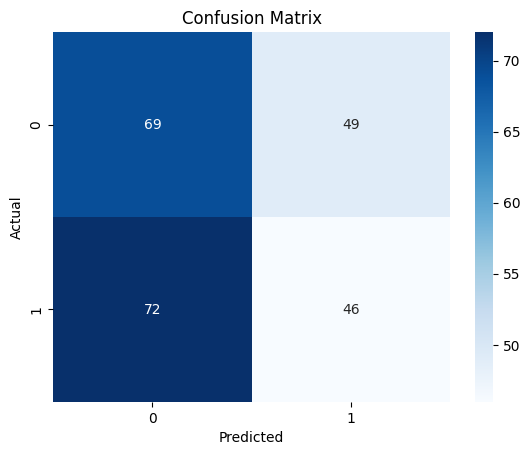

In [35]:
# Hyperparameter grid for KNN
knn_param_grid = {
    'n_neighbors': randint(1, 30),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}
knn_random_search = RandomizedSearchCV(estimator=knn_model, param_distributions=knn_param_grid, n_iter=20, cv=3, verbose=2, random_state=42, n_jobs=-1)
knn_random_search.fit(X_train, y_train)
best_knn_model = knn_random_search.best_estimator_
print("Best KNN Parameters:", knn_random_search.best_params_)
evaluate_model(best_knn_model, X_test, y_test)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Logistic Regression Parameters: {'solver': 'liblinear', 'penalty': 'l1', 'C': 0.1}
Accuracy: 0.5042372881355932
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.45      0.48       118
           1       0.50      0.56      0.53       118

    accuracy                           0.50       236
   macro avg       0.50      0.50      0.50       236
weighted avg       0.50      0.50      0.50       236



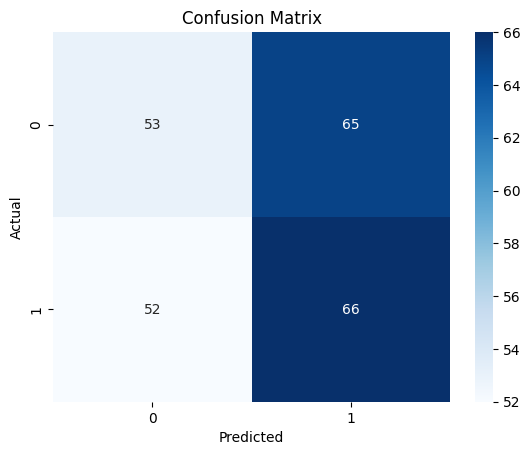

In [36]:
# Hyperparameter grid for Logistic Regression
lr_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'penalty': ['l1', 'l2']
}
lr_random_search = RandomizedSearchCV(estimator=lr_model, param_distributions=lr_param_grid, n_iter=20, cv=3, verbose=2, random_state=42, n_jobs=-1)
lr_random_search.fit(X_train, y_train)
best_lr_model = lr_random_search.best_estimator_
print("Best Logistic Regression Parameters:", lr_random_search.best_params_)
evaluate_model(best_lr_model, X_test, y_test)

Tuned Logistic Regression Accuracy: 0.5042
Tuned Decision Tree Accuracy: 0.5508
Tuned K-Nearest Neighbors Accuracy: 0.4873
Tuned Random Forest Accuracy: 0.5424
Tuned Support Vector Machine Accuracy: 0.4915
Tuned XGBoost Accuracy: 0.5085


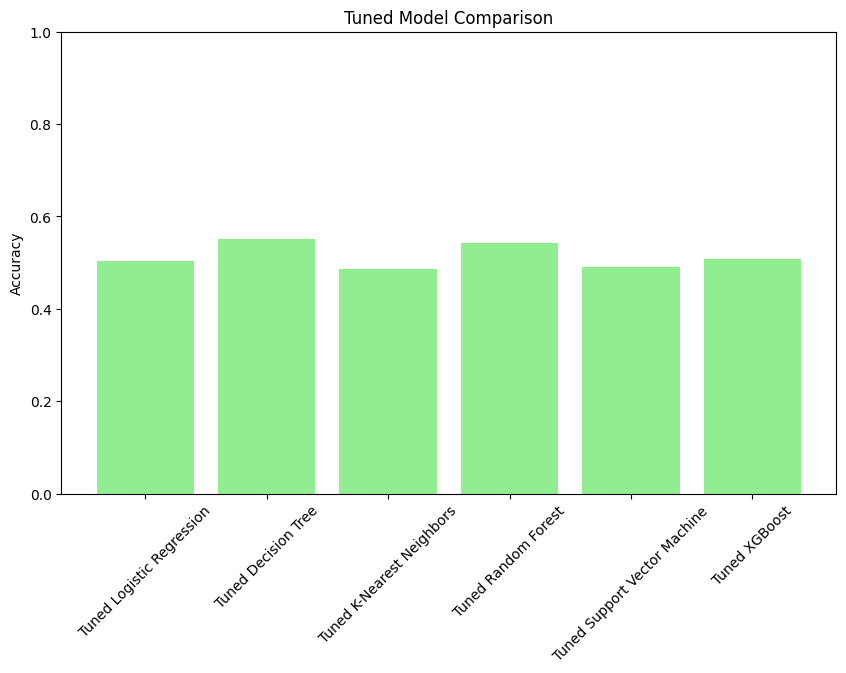

In [37]:
# Having tuned all models, we can now compare their performances again
tuned_models = {
    "Tuned Logistic Regression": best_lr_model,
    "Tuned Decision Tree": best_dt_model,
    "Tuned K-Nearest Neighbors": best_knn_model,
    "Tuned Random Forest": best_rf_model,
    "Tuned Support Vector Machine": best_svm_model,
    "Tuned XGBoost": best_xgb_model
}

tuned_results = compare_models(tuned_models, X_test, y_test)
plt.figure(figsize=(10, 6))
plt.bar(tuned_results.keys(), tuned_results.values(), color='lightgreen')  
plt.ylabel('Accuracy')
plt.title('Tuned Model Comparison')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()


Even after tuning ML models perform poorly on detection of AI generated text, showing low accuracies overall